In [ ]:
#EDA
import pandas as pd
import statsmodels as sm
import numpy as np
import matplotlib.pyplot as plt

EDA for time series

In [ ]:
dataf = pd.read_csv('raw_data.csv')#, index_col = 'Date', parse_dates=True)
dataf['Date'] = pd.to_datetime(dataf['Date'], dayfirst=True)

In [ ]:
dataf

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26,41,37,24,264,272,270,273,311,309,353,305,107,422,1367,632
1,2009-01-08,28,41,31,22,263,270,271,272,310,313,318,304,632,632,947,632
2,2009-01-15,29,36,27,22,265,272,271,269,311,310,309,305,737,737,947,1157
3,2009-01-22,28,35,28,25,266,274,271,270,312,311,308,309,317,737,737,1157
4,2009-01-29,26,31,25,28,267,269,270,271,309,309,304,311,947,842,1367,1157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41,33,21,47,274,272,269,271,311,304,302,310,737,1262,1682,737
308,2014-11-27,40,27,24,45,271,272,268,267,310,304,303,307,737,842,1577,527
309,2014-12-04,38,26,28,45,269,270,265,267,307,304,303,307,842,1052,1367,842
310,2014-12-11,32,26,32,49,272,273,266,264,302,305,303,307,842,1052,1472,737


OUTLIER DETECTION

In [ ]:
df_no_outlier = pd.DataFrame(dataf)

In [ ]:
products = ['r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
for i in products:
  Q1 = dataf[i].quantile(0.25)
  Q3 = dataf[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  df_no_outlier[i] = dataf[i][(dataf[i]>lower_limit)&(dataf[i]<upper_limit)]

In [ ]:
df_no_outlier

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26.0,41,37,24,264.0,272,270.0,273,311.0,309.0,NaN,305.0,107,422.0,1367.0,632.0
1,2009-01-08,28.0,41,31,22,263.0,270,271.0,272,310.0,313.0,318.0,304.0,632,632.0,947.0,632.0
2,2009-01-15,29.0,36,27,22,265.0,272,271.0,269,311.0,310.0,309.0,305.0,737,737.0,947.0,1157.0
3,2009-01-22,28.0,35,28,25,266.0,274,271.0,270,312.0,311.0,308.0,309.0,317,737.0,737.0,1157.0
4,2009-01-29,26.0,31,25,28,267.0,269,270.0,271,309.0,309.0,304.0,311.0,947,842.0,1367.0,1157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41.0,33,21,47,274.0,272,269.0,271,311.0,304.0,302.0,310.0,737,1262.0,1682.0,737.0
308,2014-11-27,40.0,27,24,45,271.0,272,268.0,267,310.0,304.0,303.0,307.0,737,842.0,1577.0,527.0
309,2014-12-04,38.0,26,28,45,269.0,270,265.0,267,307.0,304.0,303.0,307.0,842,1052.0,1367.0,842.0
310,2014-12-11,32.0,26,32,49,272.0,273,266.0,264,302.0,305.0,303.0,307.0,842,1052.0,1472.0,737.0


ADJUSTMENT FOR OUTLIER MISSING VALUES

In [ ]:
x = df_no_outlier.iloc[:, :].values

In [ ]:
x[0][11]

nan

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(x[:,1:])   #3 because last index is excuded
x[:,1:] = imputer.transform(x[:,1:])

In [ ]:
products = ['Date', 'r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
df_clean = pd.DataFrame(x,columns=products)

FINAL DATASET

In [ ]:
df_clean

,Date,r1mw,r2mw,r3mw,r4mw,r1m,r2m,r3m,r4m,r1c,r2c,r3c,r4c,r1a,r2a,r3a,r4a
0,2009-01-01,26,41,37,24,264,272,270,273,311,309,311.01,305,107,422,1367,632
1,2009-01-08,28,41,31,22,263,270,271,272,310,313,318,304,632,632,947,632
2,2009-01-15,29,36,27,22,265,272,271,269,311,310,309,305,737,737,947,1157
3,2009-01-22,28,35,28,25,266,274,271,270,312,311,308,309,317,737,737,1157
4,2009-01-29,26,31,25,28,267,269,270,271,309,309,304,311,947,842,1367,1157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,2014-11-20,41,33,21,47,274,272,269,271,311,304,302,310,737,1262,1682,737
308,2014-11-27,40,27,24,45,271,272,268,267,310,304,303,307,737,842,1577,527
309,2014-12-04,38,26,28,45,269,270,265,267,307,304,303,307,842,1052,1367,842
310,2014-12-11,32,26,32,49,272,273,266,264,302,305,303,307,842,1052,1472,737


In [ ]:
products = ['r1mw',	'r2mw',	'r3mw',	'r4mw',	'r1m',	'r2m',	'r3m',	'r4m',	'r1c',	'r2c',	'r3c',	'r4c',	'r1a',	'r2a',	'r3a',	'r4a']
for i in products:
  df_clean[i] = pd.to_numeric(df_clean[i])

In [ ]:
df_clean.dtypes

Date    datetime64[ns]
r1mw           float64
r2mw           float64
r3mw           float64
r4mw           float64
r1m            float64
r2m            float64
r3m            float64
r4m            float64
r1c            float64
r2c            float64
r3c            float64
r4c            float64
r1a            float64
r2a            float64
r3a            float64
r4a            float64
dtype: object

RNN LSTM

In [ ]:
train = df_clean.iloc[:-30]
test = df_clean.iloc[-30:]
#train
#test['Date']

Epoch 1/150
8/8 [==============================] - 7s 49ms/step - loss: 0.0820
Epoch 2/150
8/8 [==============================] - 0s 51ms/step - loss: 0.0446
Epoch 3/150
8/8 [==============================] - 0s 52ms/step - loss: 0.0442
Epoch 4/150
8/8 [==============================] - 0s 51ms/step - loss: 0.0412
Epoch 5/150
8/8 [==============================] - 0s 53ms/step - loss: 0.0417
Epoch 6/150
8/8 [==============================] - 0s 51ms/step - loss: 0.0412
Epoch 7/150
8/8 [==============================] - 0s 50ms/step - loss: 0.0413
Epoch 8/150
8/8 [==============================] - 0s 53ms/step - loss: 0.0410
Epoch 9/150
8/8 [==============================] - 0s 52ms/step - loss: 0.0408
Epoch 10/150
8/8 [==============================] - 0s 53ms/step - loss: 0.0448
Epoch 11/150
8/8 [==============================] - 0s 51ms/step - loss: 0.0415
Epoch 12/150
8/8 [==============================] - 0s 53ms/step - loss: 0.0414
Epoch 13/150
8/8 [==============================]

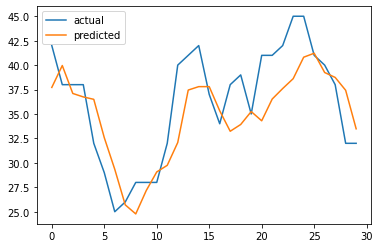

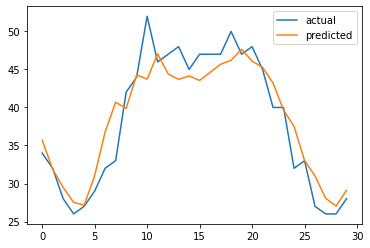

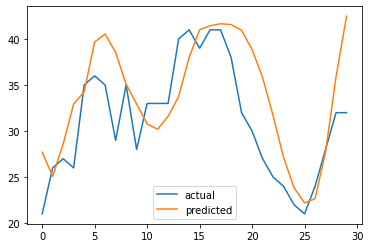

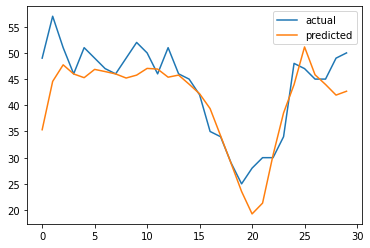

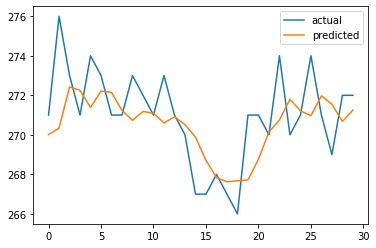

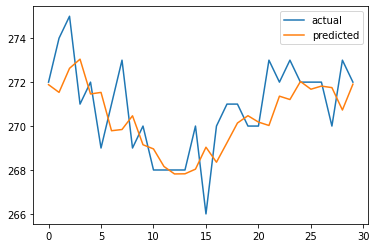

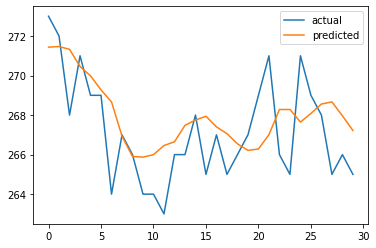

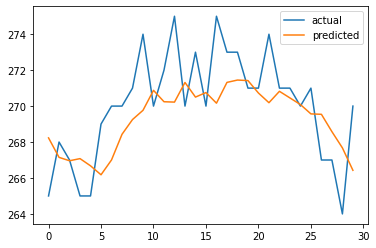

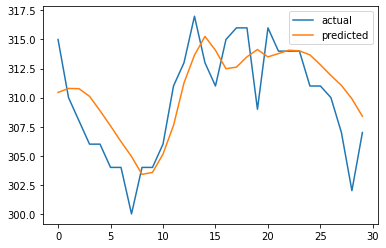

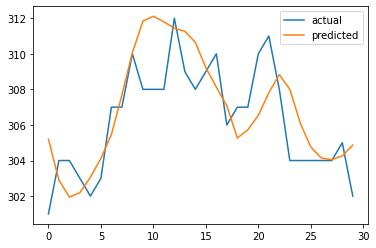

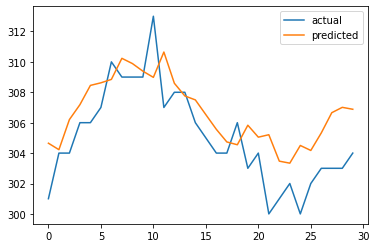

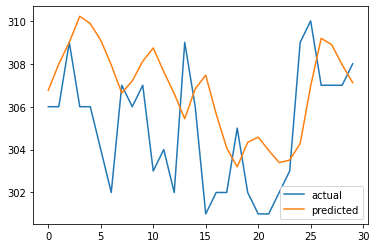

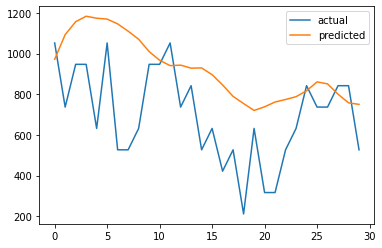

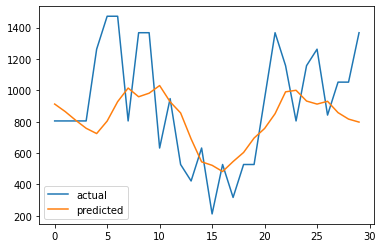

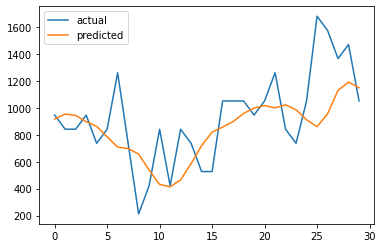

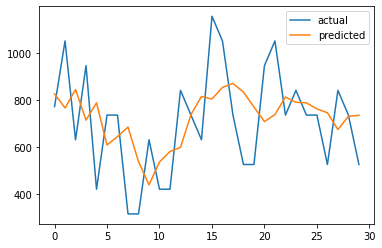

In [ ]:
# Recurrent Neural Network
for j in products:
	print("The product is: " ,j)
	# Feature Scaling
	from sklearn.preprocessing import MinMaxScaler
	sc = MinMaxScaler(feature_range = (0, 1))
	training_set_scaled = sc.fit_transform(train[[j]])

	# Creating a data structure with 60 timesteps and 1 output
	X_train = []
	y_train = []
	for i in range(40, 282):
		X_train.append(training_set_scaled[i-40:i, 0])
		y_train.append(training_set_scaled[i, 0])
	X_train, y_train = np.array(X_train), np.array(y_train)

	# Reshaping
	X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



	# Part 2 - Building the RNN

	# Importing the Keras libraries and packages
	from keras.models import Sequential
	from keras.layers import Dense
	from keras.layers import LSTM
	from keras.layers import Dropout

	# Initialising the RNN
	regressor = Sequential()

	# Adding the first LSTM layer and some Dropout regularisation
	regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
	regressor.add(Dropout(0.2))

	# Adding a second LSTM layer and some Dropout regularisation
	regressor.add(LSTM(units = 100, return_sequences = True))
	regressor.add(Dropout(0.2))

	# Adding a third LSTM layer and some Dropout regularisation
	regressor.add(LSTM(units = 100, return_sequences = True))
	regressor.add(Dropout(0.2))

	# Adding a fourth LSTM layer and some Dropout regularisation
	regressor.add(LSTM(units = 100))
	regressor.add(Dropout(0.2))

	# Adding the output layer
	regressor.add(Dense(units = 1))

	# Compiling the RNN
	regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

	# Fitting the RNN to the Training set
	regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)



	# Part 3 - Making the predictions and visualising the results

	# Getting the real stock price of 2017
	dataset_test = test[j]
	real_stock_price = test

	# Getting the predicted stock price of 2017
	dataset_total = pd.concat((train[j], dataset_test), axis = 0)
	inputs = dataset_total[len(dataset_total) - len(dataset_test) - 40:].values
	inputs = inputs.reshape(-1,1)
	inputs = sc.transform(inputs)
	X_test = []
	for i in range(40, 70):
		X_test.append(inputs[i-40:i, 0])
	X_test = np.array(X_test)
	X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
	predicted_stock_price = regressor.predict(X_test)
	predicted_stock_price = sc.inverse_transform(predicted_stock_price)

	pred1 = np.array(predicted_stock_price)
	pred2 = np.array(test[j])
	df = pd.DataFrame()
	df['actual'] = pred2
	df['predicted'] = pred1
	df
	df.plot()

	from sklearn.metrics import mean_squared_error
	from sklearn.metrics import r2_score
	from math import sqrt
	rmse=sqrt(mean_squared_error(pred1,pred2))
	r2 = r2_score(pred1,pred2)
	print("RMSE is: ",rmse)
	print("R2 is: ",r2)

for product4

The product is:  r1a
Epoch 1/150
8/8 [==============================] - 12s 49ms/step - loss: 0.0752
Epoch 2/150
8/8 [==============================] - 0s 51ms/step - loss: 0.0485
Epoch 3/150
8/8 [==============================] - 0s 50ms/step - loss: 0.0461
Epoch 4/150
8/8 [==============================] - 0s 50ms/step - loss: 0.0455
Epoch 5/150
8/8 [==============================] - 0s 50ms/step - loss: 0.0456
Epoch 6/150
8/8 [==============================] - 0s 50ms/step - loss: 0.0461
Epoch 7/150
8/8 [==============================] - 0s 53ms/step - loss: 0.0475
Epoch 8/150
8/8 [==============================] - 0s 49ms/step - loss: 0.0439
Epoch 9/150
8/8 [==============================] - 0s 51ms/step - loss: 0.0422
Epoch 10/150
8/8 [==============================] - 0s 49ms/step - loss: 0.0459
Epoch 11/150
8/8 [==============================] - 0s 51ms/step - loss: 0.0433
Epoch 12/150
8/8 [==============================] - 0s 50ms/step - loss: 0.0405
Epoch 13/150
8/8 [=========

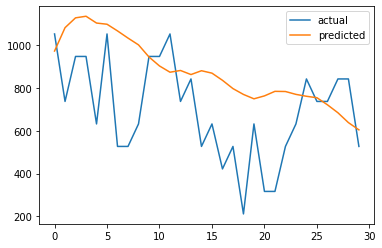

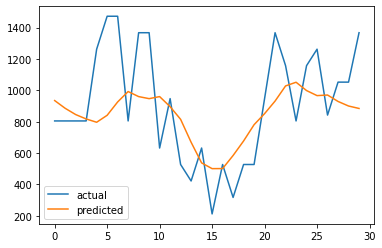

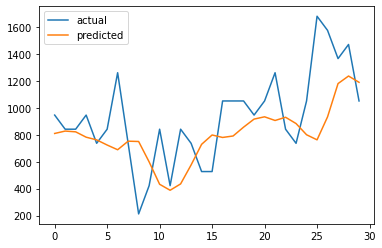

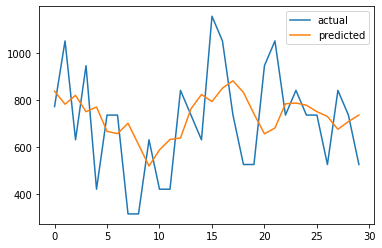

In [ ]:
# Recurrent Neural Network
prod4 = ['r1a',	'r2a',	'r3a',	'r4a']
for j in prod4:
	print("The product is: " ,j)
	# Feature Scaling
	from sklearn.preprocessing import MinMaxScaler
	sc = MinMaxScaler(feature_range = (0, 1))
	training_set_scaled = sc.fit_transform(train[[j]])

	# Creating a data structure with 60 timesteps and 1 output
	X_train = []
	y_train = []
	for i in range(40, 282):
		X_train.append(training_set_scaled[i-40:i, 0])
		y_train.append(training_set_scaled[i, 0])
	X_train, y_train = np.array(X_train), np.array(y_train)

	# Reshaping
	X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



	# Part 2 - Building the RNN
	# Importing the Keras libraries and packages
	from keras.models import Sequential
	from keras.layers import Dense
	from keras.layers import LSTM
	from keras.layers import Dropout
	# Initialising the RNN
	regressor = Sequential()

	# Adding the first LSTM layer and some Dropout regularisation
	regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
	regressor.add(Dropout(0.4))

	# Adding a second LSTM layer and some Dropout regularisation
	regressor.add(LSTM(units = 100, return_sequences = True))
	regressor.add(Dropout(0.4))

	# Adding a third LSTM layer and some Dropout regularisation
	regressor.add(LSTM(units = 100, return_sequences = True))
	regressor.add(Dropout(0.4))

	# Adding a fourth LSTM layer and some Dropout regularisation
	regressor.add(LSTM(units = 100))
	regressor.add(Dropout(0.4))

	# Adding the output layer
	regressor.add(Dense(units = 1))

	# Compiling the RNN
	regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

	# Fitting the RNN to the Training set
	regressor.fit(X_train, y_train, epochs = 150, batch_size = 32)



	# Part 3 - Making the predictions and visualising the results

	# Getting the real stock price of 2017
	dataset_test = test[j]
	real_stock_price = test

	# Getting the predicted stock price of 2017
	dataset_total = pd.concat((train[j], dataset_test), axis = 0)
	inputs = dataset_total[len(dataset_total) - len(dataset_test) - 40:].values
	inputs = inputs.reshape(-1,1)
	inputs = sc.transform(inputs)
	X_test = []
	for i in range(40, 70):
		X_test.append(inputs[i-40:i, 0])
	X_test = np.array(X_test)
	X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
	predicted_stock_price = regressor.predict(X_test)
	predicted_stock_price = sc.inverse_transform(predicted_stock_price)

	pred1 = np.array(predicted_stock_price)
	pred2 = np.array(test[j])
	df = pd.DataFrame()
	df['actual'] = pred2
	df['predicted'] = pred1
	df
	df.plot()

	from sklearn.metrics import mean_squared_error
	from sklearn.metrics import r2_score
	from math import sqrt
	rmse=sqrt(mean_squared_error(pred1,pred2))
	r2 = r2_score(pred1,pred2)
	print("RMSE is: ",rmse)
	print("R2 is: ",r2)